<h1>Sandra Field </h1>
MSDS 432, Dr Ali <br>
Spring 2021<br>
<h3>Iteration and Recursion</h3><br>

In [21]:
import math
import sys
from scipy import stats
import numpy as np
import pandas as pd
import time
import timeit
from time import perf_counter, perf_counter_ns
from random import shuffle
from random import seed
from random import random
import matplotlib.pyplot as plt
#import matplotlib.style as style
import seaborn as sns
%matplotlib inline

sns.set_style('white')


<h2>Algorithms</h2>

In [28]:
def recursive_fact(n):
    if n == 1:
        return 1
    else:
        return n * recursive_fact(n-1)
    
def iterative_fact(n):
    result = 1
    for i in range(n, 1, -1):
        result *= i
    return result

<h2>Time Tracking Function</h2>

In [29]:
#A time tracking function

def elapsed(func):
    time_start = perf_counter_ns()
    func()
    time_stop = perf_counter_ns()
    return ((time_stop - time_start) / 1000000) #convert from ns to ms

<h2>Create and Sort Data</h2>

In [52]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['N', 'Factorial', 'Recursive_ms', 'Iterative_ms', 'Diff_ms'])

In [53]:
np.random.seed(424242)
sys.setrecursionlimit(5000) # allow for benchmarking by increasing recursion depth

In [54]:
array_size = 10
arrx = []  #initialize new array 
arrx = list(np.unique(np.random.uniform(100,500, array_size).astype(int))) #this will ensure no duplicates, but sorts data
arrx

[118, 148, 160, 208, 228, 268, 298, 374, 399, 403]

In [55]:
for i in range(len(arrx)):
    n = arrx[i]
    fact_int = iterative_fact(n)
    fact_rec = recursive_fact(n)
    
    recurs_time = elapsed(lambda: recursive_fact(n))
    iterat_time = elapsed(lambda: iterative_fact(n))
    
    results.loc[i] = [n, str(fact_int), recurs_time, iterat_time, recurs_time - iterat_time]
                    

<ipython-input-28-0b93424112e3>:5: RuntimeWarning: overflow encountered in long_scalars
  return n * recursive_fact(n-1)


<h1>Results</h1>

In [56]:
results

,N,Factorial,Recursive_ms,Iterative_ms,Diff_ms
0,118,4684525849754290656574312362808384164392679504...,0.0680,0.0108,0.0572
1,148,2556323917872865588581178015776757943261545225...,0.0823,0.0132,0.0691
2,160,4714723635992061322406943211761943779511926230...,0.1079,0.0141,0.0938
3,208,2411110054505276003287178952912926704433581813...,0.1160,0.0281,0.0879
4,228,1473056256822997000534113214143303862239216277...,0.1262,0.0228,0.1034
5,268,9172675347196891999781112454545139236912362564...,0.1392,0.0297,0.1095
6,298,3412012399291422921241588197293964653161525130...,0.1521,0.0310,0.1211
7,374,3261861331620740114772523153105160433627580431...,0.1824,0.0443,0.1381
8,399,1600863071165597381558699257987575146267564575...,0.1990,0.0473,0.1517
9,403,4159964740224350461124650057112142990305417988...,0.1947,0.0476,0.1471


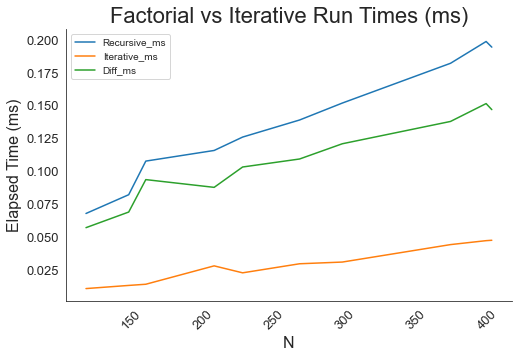

In [57]:
ax = results.plot.line(x='N', figsize=(8,5), fontsize=13) #, marker='o', legend=False)
ax.set_title('Factorial vs Iterative Run Times (ms)',fontsize= 22)
ax.set_xlabel('N',fontsize=16)
plt.xticks(rotation=45)
ax.set_ylabel('Elapsed Time (ms)',fontsize=16)
sns.despine()
plt.show()

<h1>Summary</h1>

<p style="font-size:18px;color:#57595D; font-weight:normal; font-style:normal;font-family: 'Verdana'">
          Recursion is when a function calls itself. Recursion can take lots of extra memory and time, because it puts a lot more data onto the call stack during runtime.   As seen above, the iterative version of factorials takes much less time. Itarative loops can be longer and more difficult to write for programmers though, so there is a greater risk of error.</p>

<p style="font-size:18px;color:#57595D; font-weight:normal; font-style:normal;font-family: 'Verdana'">
    Iteration requires <span style="color: red;"><b> O(n) </b></span> time, but since recursion calls itself and uses the call stack so intensely, it requires <span style="color: red;"><b> (O(n) * n) </b></span> time or <em style="color: red;"><b>O(n)<sup>2 </sup> </b></em>time. </p>
    
<p style="font-size:18px;color:#57595D; font-weight:normal; font-style:normal;font-family: 'Verdana'">
</p>